In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/_api/v2/version/__init__.py'>


In [5]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/_api/v2/version/__init__.py'>


In [7]:
#loads a CSV file into a pandas DataFrame  
# prints the first few rows to give you a preview of the data
file_path = "Datasets/Vaccination_Coverage_among_Young_Children__0-35_Months__20241101.csv"
df = pd.read_csv(file_path)
print(df.head())

  Vaccine      Dose      Geography Type     Geography Birth Year/Birth Cohort  \
0    DTaP  ≥3 Doses  States/Local Areas  North Dakota                    2019   
1    DTaP  ≥3 Doses  States/Local Areas  North Dakota                    2018   
2    DTaP  ≥3 Doses  States/Local Areas  North Dakota               2018-2019   
3   Polio  ≥3 Doses  States/Local Areas  North Dakota                    2021   
4   Polio  ≥2 Doses  States/Local Areas  North Dakota                    2021   

  Dimension Type  Dimension  Estimate (%)    95% CI (%)  Sample Size  
0            Age  19 Months          93.5  88.0 to 96.6        263.0  
1            Age  19 Months          95.2  91.0 to 97.5        293.0  
2            Age  19 Months          91.8  88.3 to 94.3        556.0  
3            Age  19 Months          89.4  81.9 to 94.1        143.0  
4            Age   5 Months          79.3  69.0 to 86.8        143.0  


In [10]:
#remove rows with missing values (NaN) in the specified column, Estimate (%)
# makes sure the Estimate (%) column has no missing values, which could interfere with calculations or visualizations
df_clean = df.dropna(subset=['Estimate (%)'])


In [11]:
# Strip any leading/trailing spaces
df_clean['Dimension'] = df_clean['Dimension'].str.strip()

# Standardize to "Title Case" (e.g., "5 Months" instead of "5 months")
df_clean['Dimension'] = df_clean['Dimension'].str.title()

/var/folders/mv/8_77q4lx4slf_z8r0xl7hd4c0000gn/T/ipykernel_1551/3691445116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Dimension'] = df_clean['Dimension'].str.strip()
/var/folders/mv/8_77q4lx4slf_z8r0xl7hd4c0000gn/T/ipykernel_1551/3691445116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Dimension'] = df_clean['Dimension'].str.title()


In [12]:
regions = {
    'Northeast': ['Maine', 'New York', ...],
    'Midwest': ['Illinois', 'Ohio', ...],
    'South': ['Texas', 'Florida', ...],
    'West': ['California', 'Washington', ...]
}

def assign_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return None

df_clean['Region'] = df_clean['Geography'].apply(assign_region)

/var/folders/mv/8_77q4lx4slf_z8r0xl7hd4c0000gn/T/ipykernel_1551/86093099.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Region'] = df_clean['Geography'].apply(assign_region)


In [13]:
# Group by region and state, then sample proportionally (e.g., 20% from each state)
df_sampled = df_clean.groupby(['Region', 'Geography']).apply(lambda x: x.sample(frac=0.2, random_state=42)).reset_index(drop=True)


In [14]:
# code performs a two-way ANOVA to analyze the effects of two categorical variables (Region and Dimension)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Q("Estimate (%)") ~ C(Region) * C(Dimension)', data=df_sampled).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                               sum_sq      df          F        PR(>F)
C(Region)                 2826.306931     3.0   6.679041  1.277106e-03
C(Dimension)             70016.269689    25.0  19.855232  1.504742e-75
C(Region):C(Dimension)   15604.431503    75.0   1.475036  5.608351e-03
Residual                394949.908316  2800.0        NaN           NaN


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 23
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 75, but rank is 74
  warnings.warn('covariance of constraints does not have full '


In [15]:
# Remove rows with missing values in 'Estimate (%)' and 'Region'
df_tukey_region = df_clean.dropna(subset=['Estimate (%)', 'Region'])

# Remove rows with missing values in 'Estimate (%)' and 'Dimension'
df_tukey_age = df_clean.dropna(subset=['Estimate (%)', 'Dimension'])


In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's test for regions
tukey_region = pairwise_tukeyhsd(df_tukey_region['Estimate (%)'], df_tukey_region['Region'])
print(tukey_region)

# Tukey's test for age milestones
tukey_age = pairwise_tukeyhsd(df_tukey_age['Estimate (%)'], df_tukey_age['Dimension'])
print(tukey_age)



   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
  Midwest Northeast   1.0565 0.0033   0.266  1.847   True
  Midwest     South  -0.7386 0.0756 -1.5266 0.0495  False
  Midwest      West   0.4758 0.4107 -0.3155 1.2671  False
Northeast     South  -1.7951    0.0 -2.5831 -1.007   True
Northeast      West  -0.5807 0.2342 -1.3721 0.2106  False
    South      West   1.2143 0.0004  0.4254 2.0032   True
---------------------------------------------------------
                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                 
                group1                                group2                meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------------------------------
                             0-1 Days                              0-

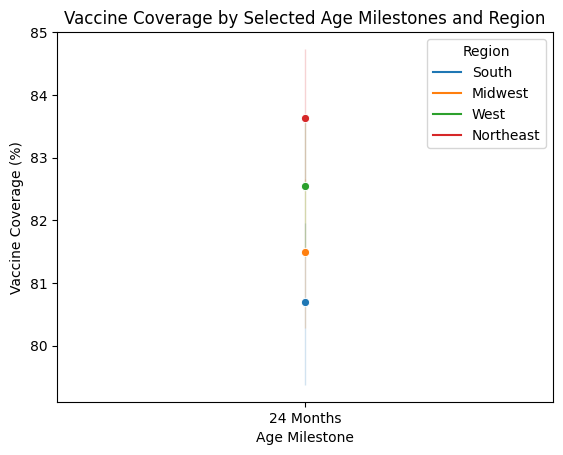

In [17]:
# Filter for specific age milestones (e.g., 6 months, 12 months, 18 months, 24 months)
age_milestones = ['6 Months', '12 Months', '18 Months', '24 Months']
df_filtered = df_clean[df_clean['Dimension'].isin(age_milestones)]

sns.lineplot(data=df_filtered, x='Dimension', y='Estimate (%)', hue='Region', marker='o')
plt.title('Vaccine Coverage by Selected Age Milestones and Region')
plt.xlabel('Age Milestone')
plt.ylabel('Vaccine Coverage (%)')
plt.show()


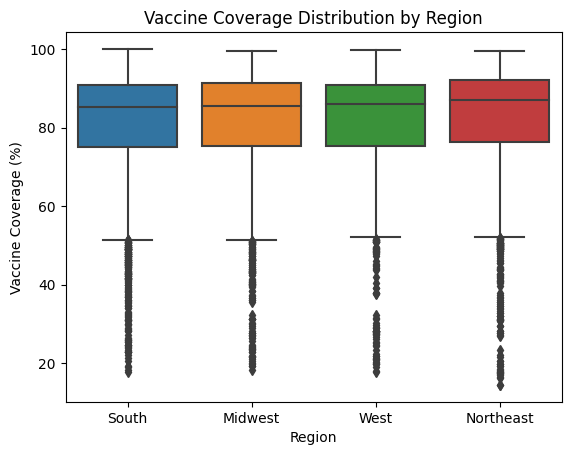

In [18]:
sns.boxplot(data=df_clean, x='Region', y='Estimate (%)')
plt.title('Vaccine Coverage Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Vaccine Coverage (%)')
plt.show()


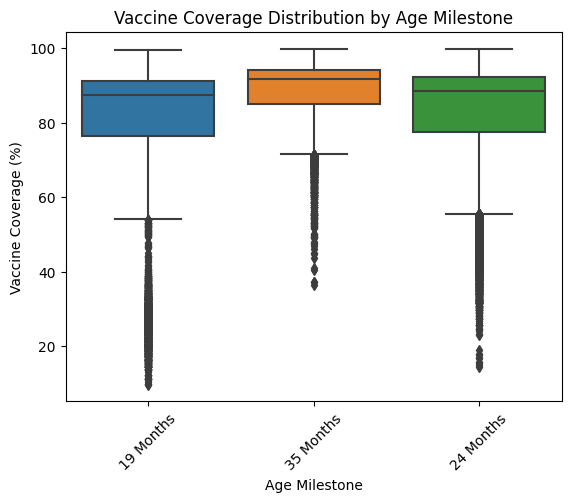

In [19]:
# Define the list of age milestones you want to keep
age_milestones = [
    '0 Days', '2 Months', '4 Months', '6 Months', '9 Months', '12 Months', 
    '15 Months', '18 Months', '19 Months', '24 Months', '35 Months'
]

# Filter the DataFrame to include only these age milestones
df_age_only = df_clean[df_clean['Dimension'].isin(age_milestones)]

# Plot the filtered data
sns.boxplot(data=df_age_only, x='Dimension', y='Estimate (%)')
plt.title('Vaccine Coverage Distribution by Age Milestone')
plt.xlabel('Age Milestone')
plt.ylabel('Vaccine Coverage (%)')
plt.xticks(rotation=45)
plt.show()


/var/folders/mv/8_77q4lx4slf_z8r0xl7hd4c0000gn/T/ipykernel_1551/3845683099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age Group'] = df_clean['Dimension'].apply(lambda x: '0-6 Months' if x in ['0 Days', '2 Months', '4 Months', '6 Months']


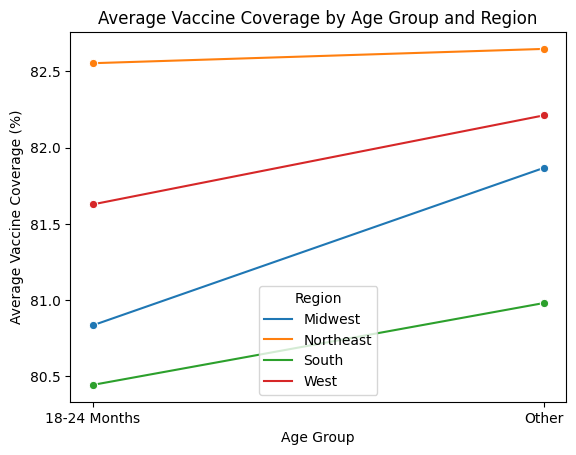

In [20]:
# Create broader age categories
df_clean['Age Group'] = df_clean['Dimension'].apply(lambda x: '0-6 Months' if x in ['0 Days', '2 Months', '4 Months', '6 Months'] 
                                                    else '6-12 Months' if x in ['9 Months', '12 Months']
                                                    else '12-18 Months' if x in ['15 Months', '18 Months']
                                                    else '18-24 Months' if x in ['19 Months', '24 Months']
                                                    else 'Other')

# Calculate the average coverage for each region and age group
df_grouped = df_clean.groupby(['Age Group', 'Region'])['Estimate (%)'].mean().reset_index()

sns.lineplot(data=df_grouped, x='Age Group', y='Estimate (%)', hue='Region', marker='o')
plt.title('Average Vaccine Coverage by Age Group and Region')
plt.xlabel('Age Group')
plt.ylabel('Average Vaccine Coverage (%)')
plt.show()


In [21]:
# Check unique values in the 'Dimension' column to see available age milestones
unique_age_milestones = df_clean['Dimension'].unique()
print(sorted(unique_age_milestones))

['0-1 Days', '0-2 Days', '0-3 Days', '13 Months', '133% To <400% Fpl', '19 Months', '24 Months', '3 Months', '35 Months', '5 Months', '7 Months', '8 Months', '<133% Fpl', '>400% Fpl', 'Any Medicaid', 'Black, Non-Hispanic', 'Hispanic', 'Living In A Msa Non-Principal City', 'Living In A Msa Principal City', 'Living In A Non-Msa', 'Other', 'Other Or Multiple Races, Non-Hispanic', 'Overall', 'Private Insurance Only', 'Uninsured', 'White, Non-Hispanic']


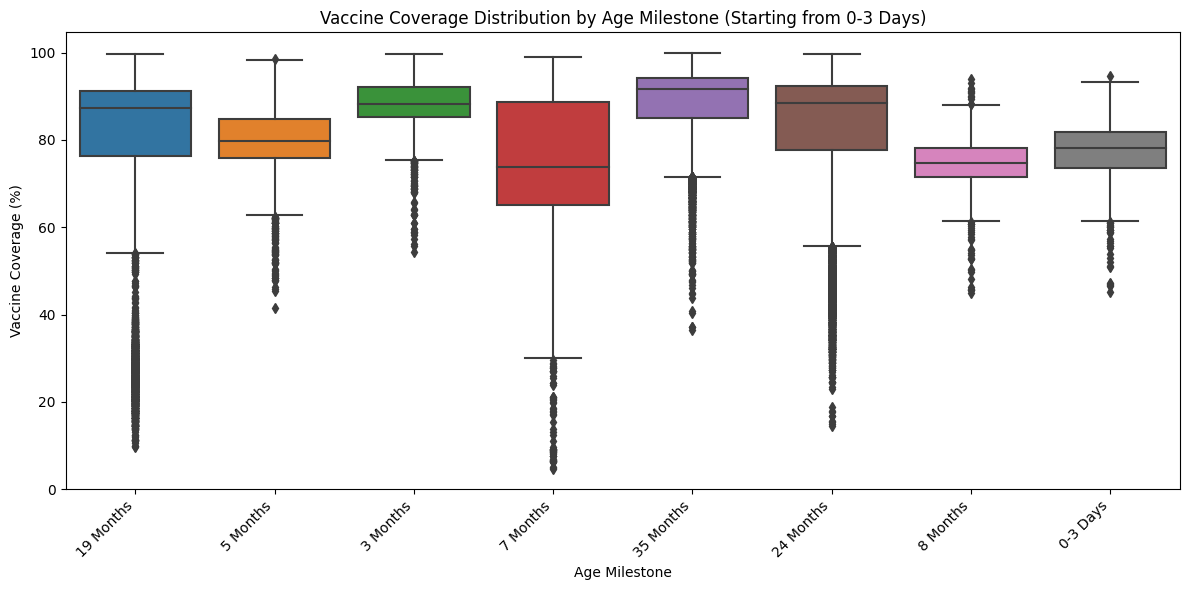

In [22]:
# Define a new list of available age milestones starting from "0-3 Days"
# (Adjust based on your dataset's actual contents)
age_milestones_from_0_3_days = [
    '0-3 Days', '1 Month', '2 Months', '3 Months', '4 Months', '5 Months',
    '6 Months', '7 Months', '8 Months', '9 Months', '12 Months', 
    '15 Months', '18 Months', '19 Months', '24 Months', '35 Months'
]

# Filter the DataFrame again based on this list
df_filtered = df_clean[df_clean['Dimension'].isin(age_milestones_from_0_3_days)]

# Plot the filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Dimension', y='Estimate (%)')

# Set the title and labels
plt.title('Vaccine Coverage Distribution by Age Milestone (Starting from 0-3 Days)')
plt.xlabel('Age Milestone')
plt.ylabel('Vaccine Coverage (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
